# Detección de Outliers

Los datos que usaremos en este notebook, "DS_Clase_13_Data_1.csv" y "DS_Clase_13_Data_2.csv",  fueron simulados con algún criterio desconocido. Uno de los archivos contiene "valores atípicos" y el otro no. El objetivo de este Notebook es que decidan en cuál de ellos hay outliers y apliquen las técnicas vistas para detectarlos.

## Ejercicios

Analizar, siguiendo las siguientes instrucciones, el archivo "DS_Clase_13_Data_1.csv". No se olviden de ir escribiendo las conclusiones a las que llegan a medida que avancen. Una vez completado, repetir para "DS_Clase_13_Data_2.csv".

1. Exploración de datos.
    1. Abrir los datos y explorarlos. Para ello, recomendamos hacer un `distplot` y un `boxplot`. ¿Hay valores atípicos? Si los hay, ¿en qué región del dominio?
    2. Calcular algunos estadísticos sobre la muestra: valor medio, desviación estándar, cuartiles, máximo, mínimo, etc.
2. Reescaleo de datos
    1. Agregar al dataframe una columna que se llame "Datos_Reescalados" y que contenga los datos reescalados por Z-Score. ¿Cuál es el valor medio de los datos reescalados?¿Y su desviación estándar? **Nota:** Para reescalar los datos, pueden hacerlo "a mano" o utilizar la clase `StandardScaler` de Scikit-Learn. No te olvides que las herramientas de preprocesamiento de datos de Scikit-learn tienen los mismos métodos (crear el objeto, fitearlo, transfromar los datos). Si necesitás ayuda, podés consultar la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
    2. Realizá, en un mismo gráfico, un histograma de los datos reescaleados y un histograma de los datos crudos. ¿Qué similitudes y qué diferencias tiene con la distribución de datos crudos?
3. Manejo de Outliers
    1. Aplicar la técnica del rango interquartílico y la regla de las tres sigmas para seleccionar outliers. ¿Cuántos valores selecciona cada técnica?¿Seleccionan los mismos valores?
    2. Supongamos que seleccionamos outliers y los descartamos. ¿Qué pasa si volvemos a aplicar estas técnicas?
    

### 1. Exploración de Datos

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('../csv/DS_Clase_13_Data_1.csv')
data.head()

,Datos
0,2.370556
1,3.437876
2,6.300131
3,5.403170
4,5.722120


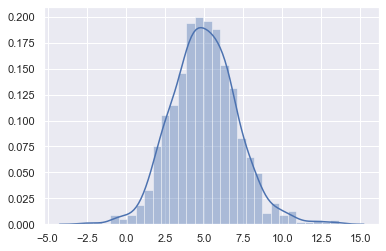

In [3]:
sns.distplot(data) # En este grafico se puede notar minimamente que hay valores atipicos en las 2 regiones del dominio 

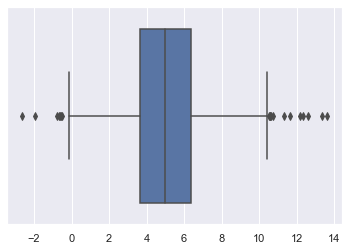

In [4]:
sns.boxplot(data) # En este grafico se puede ver mas claramente que hay valores atipicos tanto en la region negativa y positiva con respecto de la media

### 2. Reescaleo de datos

In [5]:
valor_medio = data.Datos.mean()
std = data.std()
data['Datos_Reescalados'] = (data - valor_medio)/std
data.head()

,Datos,Datos_Reescalados
0,2.370556,-1.260667
1,3.437876,-0.753899
2,6.300131,0.605114
3,5.403170,0.179233
4,5.722120,0.330672


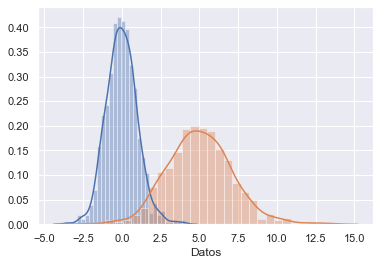

In [6]:
sns.distplot(data.Datos_Reescalados)
sns.distplot(data.Datos)

### 3. Manejo de outliers

1. Rango intercuartílico.

In [8]:
q25,q75 = data.Datos.quantile(0.25), data.Datos.quantile(0.75) # np.percentile(data.Datos, [25, 75])
iqr = q75 - q25
minimo = q25 - (1.5 * iqr)
maximo = q75 + (1.5 * iqr)

print(q25,q75,iqr, minimo, maximo)

3.6279769872275214 6.360215379673109 2.7322383924455877 -0.47038060144086025 10.45857296834149


In [9]:
mascara_outliers = np.logical_or(data.Datos < minimo, data.Datos > maximo)
mascara_outliers.sum()

19

2. Regla de las tres sigmas

In [ ]:
valor_medio = COMPLETAR
std = COMPLETAR
minimo = COMPLETAR
maximo = COMPLETAR

In [ ]:
mascara_outliers = np.logical_or(COMPLETAR, COMPLETAR)
mascara_outliers.sum()

**Para pensar**: ¿se podía aplicar más fácilmente la regla de las tres sigmas usando la columna `Datos_Reescalados`?